# **Evaluación de contenidos 1 Módulo 2**
## **Ejercicios de Pandas - Filtrado de datos y visualización**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df_music = pd.read_csv("../data/Spotify_Youtube_clean.csv", index_col = 0)
pd.options.display.max_columns = None

In [3]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20718 non-null  object 
 1   url_spotify       20718 non-null  object 
 2   track             20718 non-null  object 
 3   album             20718 non-null  object 
 4   album_type        20718 non-null  object 
 5   uri               20718 non-null  object 
 6   danceability      20716 non-null  float64
 7   energy            20716 non-null  float64
 8   key               20716 non-null  float64
 9   loudness          20716 non-null  float64
 10  speechiness       20716 non-null  float64
 11  acousticness      20716 non-null  float64
 12  instrumentalness  20716 non-null  float64
 13  liveness          20716 non-null  float64
 14  valence           20716 non-null  float64
 15  tempo             20716 non-null  float64
 16  duration_ms       20716 non-null  float6

¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". 

In [4]:
df_music["album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [5]:
df_album = df_music[df_music["album_type"] == "album"]
df_single = df_music[df_music["album_type"] == "single"]
df_compilation = df_music[df_music["album_type"] == "compilation"]

¿Cuántas canciones tenemos en cada tipo?

Se pueden ver las canciones de cada tipo desde la columna "album_type" o desde los dataframes creados. Hay 14.926 canciones de tipo album, 5004 single y 788 compilation, a través de diversos métodos. En el caso de los subsets el value_counts() no arroja los mismos resultados. 

In [6]:
df_music["album_type"].value_counts()

album          14926
single          5004
compilation      788
Name: album_type, dtype: int64

Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?.
Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [7]:
df_dance = df_music.groupby("artist")["danceability"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_dance

,artist,mean,std
1639,Saweetie,0.885800,0.050918
2022,Young Dolph,0.862900,0.046596
1256,Megan Thee Stallion,0.860500,0.091036
441,Dave,0.859100,0.096773
1427,Ovy On The Drums,0.854600,0.038739
...,...,...,...
1739,Stephen Cleobury,0.142160,0.039799
1402,Ocean Sounds,0.137980,0.063706
1403,Ocean Waves For Sleep,0.128150,0.060672
1982,White Noise for Babies,0.080233,0.156234


In [8]:
df_acoustic = df_music.groupby("artist")["acousticness"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_acoustic

,artist,mean,std
368,Claude Debussy,0.993600,0.001350
1577,Robert Schumann,0.992500,0.005503
631,Frédéric Chopin,0.990200,0.003795
529,Edvard Grieg,0.989500,0.007863
1044,Lang Lang,0.989100,0.004677
...,...,...,...
2020,Youjeen,0.000334,0.000654
1963,Volbeat,0.000220,0.000237
1312,Motionless In White,0.000166,0.000191
986,Killswitch Engage,0.000132,0.000158


In [9]:
df_speechiness = df_music.groupby("artist")["speechiness"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_speechiness

,artist,mean,std
1702,Sir Arthur Conan Doyle,0.95230,0.008845
196,Bibi Blocksberg,0.94530,0.011879
1674,Sherlock Holmes,0.93930,0.015833
1776,TKKG,0.91930,0.023542
637,Fünf Freunde,0.90620,0.048960
...,...,...,...
1208,Marcela Gandara,0.02861,0.002700
1129,Los Temerarios,0.02841,0.005328
839,Jeet Gannguli,0.02822,0.003086
1106,Los Acosta,0.02764,0.002200


Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen?  Para solucionar este ejercicio deberéis:

- Agrupar por artista y calcular la media de visitas y de likes.
- Quedaros con los 10 artistas que más visitas han tenido.
- Quedaros con los 10 artistas que más likes han tenido.
- Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.
- BONUS Haced lo mismo para los datos de tipo "single".

In [10]:
df_views = df_music.groupby("artist")["views"].mean().reset_index()
df_likes = df_music.groupby("artist")["likes"].mean().reset_index()
print(df_views, df_likes)

                 artist        views
0              (G)I-DLE  175495394.1
1                *NSYNC  102783286.2
2             070 Shake    9609935.9
3                   112   21913445.9
4     11:11 Music Group    1267282.4
...                 ...          ...
2074          will.i.am  283132016.6
2075     Ángela Aguilar  138529529.1
2076               Ñejo   62668082.4
2077         Ñengo Flow   81272631.5
2078           Øneheart    3462331.0

[2079 rows x 2 columns]                  artist      likes
0              (G)I-DLE  2446296.3
1                *NSYNC   423342.3
2             070 Shake   201300.5
3                   112   150914.1
4     11:11 Music Group    17970.1
...                 ...        ...
2074          will.i.am  1386447.1
2075     Ángela Aguilar  1029475.7
2076               Ñejo   434891.0
2077         Ñengo Flow   676034.0
2078           Øneheart   127216.7

[2079 rows x 2 columns]


In [11]:
ten_best_views = df_views.sort_values(by= "views", ascending = False).head(10)
ten_best_views

,artist,views
524,Ed Sheeran,1.546021e+09
372,CoComelon,1.460167e+09
953,Katy Perry,1.312063e+09
331,Charlie Puth,1.216759e+09
1147,Luis Fonsi,1.162811e+09
925,Justin Bieber,1.099106e+09
420,Daddy Yankee,1.087193e+09
265,Bruno Mars,1.024092e+09
1182,Macklemore & Ryan Lewis,1.012206e+09
379,Coldplay,9.997278e+08


In [12]:
ten_best_likes = df_likes.sort_values(by= "likes", ascending = False).head(10)
ten_best_likes

,artist,likes
151,BTS,13940380.8
149,BLACKPINK,13230250.5
331,Charlie Puth,8633692.5
524,Ed Sheeran,8354331.9
925,Justin Bieber,7858434.8
200,Billie Eilish,7333853.7
775,Imagine Dragons,7227447.7
57,Alan Walker,6797770.2
416,DJ Snake,6777583.1
1147,Luis Fonsi,6690848.9


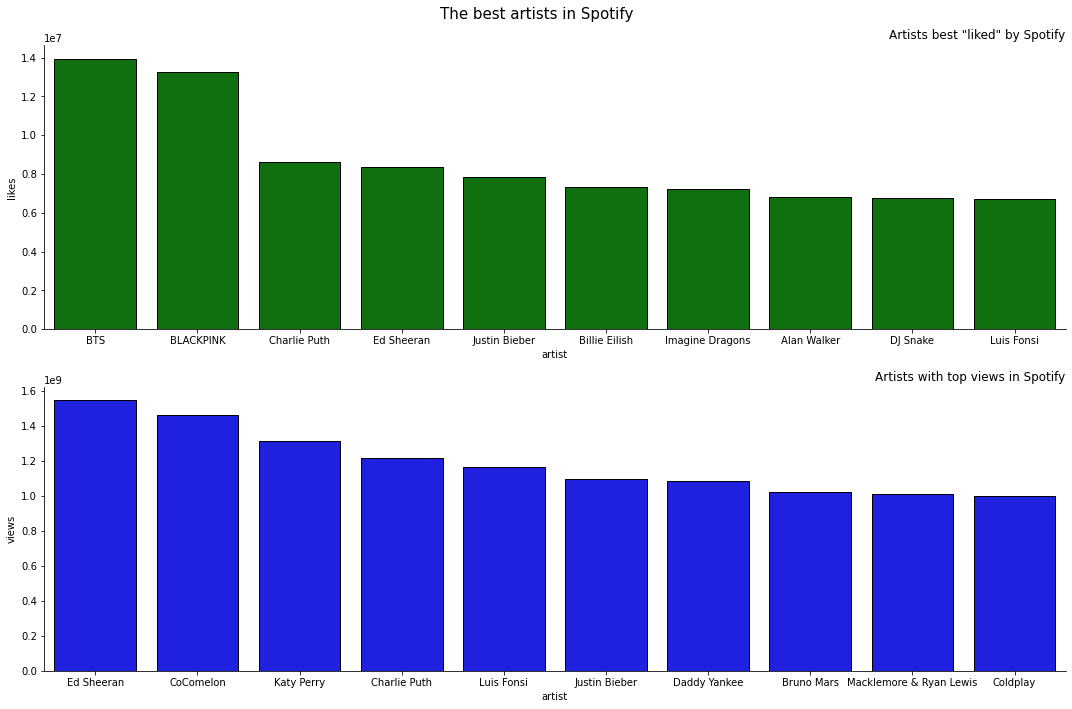

In [13]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.barplot(data = ten_best_likes, x = "artist", y = "likes", color = "green", edgecolor = "black", ax = ax[0]).set_title('Artists best "liked" by Spotify', loc = "right")
sns.barplot(data = ten_best_views, x = "artist", y = "views", color = "b", edgecolor = "black", ax = ax[1]).set_title("Artists with top views in Spotify", loc = "right")

ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)   
ax[1].spines["right"].set_visible(False)

fig.suptitle("The best artists in Spotify", fontsize = 15)   
fig.tight_layout()    

Hay tres artistas que están en los dos top ten de "views" y "likes". Aunque se pudiera pensar que debería haber correspondiencia entre las dos variables esto no lo indica tanto, aunque ciertamente son 3 de un grupo de 10. Podemos pensar en ver la correlación entre estas dos vriables, "views" y "likes" de otras maneras. 

In [14]:
music_corr= df_music.corr()

/tmp/ipykernel_474/3216023530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  music_corr= df_music.corr()


Si nos fijamos en la tabla de correlación, en el mismo sentido que se intuye por lógica, ambas variables si están correlacionadas, a pesar de que los datos de los artistas en ambas variables no sean tan claros. De manera más gráfica podemos verlo en el heatmap que sigue. Tras las correlaciones perfectas de cada variable consigo misma, la correlación más alta es la de estas dos variables y es positiva como cabía esperar, por tanto, cuanto una aumenta, tambien lo hace la otra. 

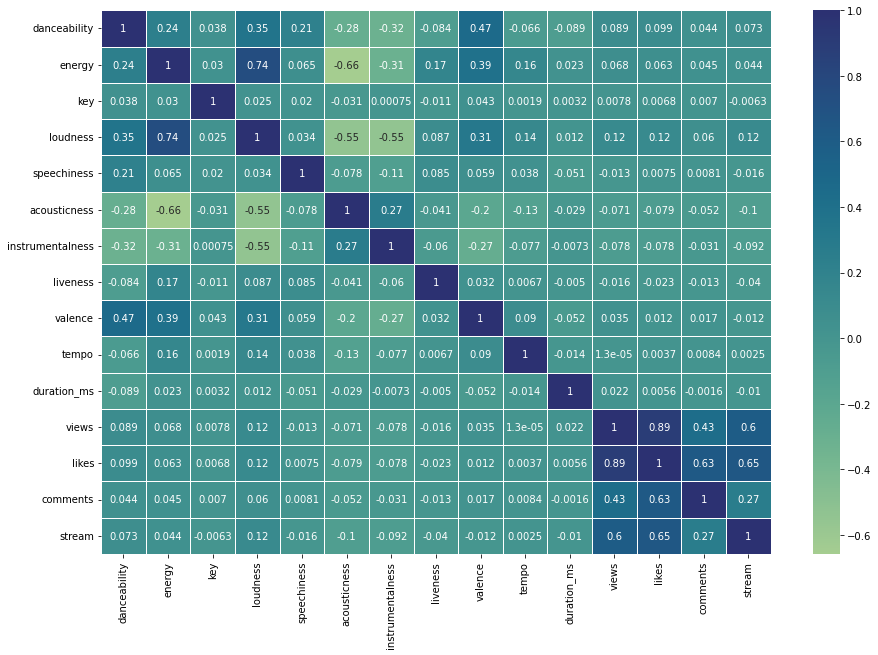

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(music_corr,
            cmap = "crest",
           annot = True,
           linewidth = .5)
plt.show()

In [16]:
df_single_views = df_single.groupby("artist")["views"].mean().reset_index()
df_single_likes = df_single.groupby("artist")["likes"].mean().reset_index()


In [17]:
ten_best_single_by_likes = df_single_likes.sort_values(by= "likes", ascending = False).head(10)
ten_best_single_by_likes

,artist,likes
221,Charlie Puth,2.087347e+07
107,BLACKPINK,1.659181e+07
1245,Twenty One Pilots,1.500336e+07
944,PSY,1.439684e+07
228,Childish Gambino,1.233227e+07
1290,Wiz Khalifa,1.194763e+07
1342,j-hope,1.177462e+07
1027,Rihanna,1.060366e+07
109,BTS,7.514177e+06
120,Bastille,7.028406e+06


In [18]:
ten_best_single_by_views = df_single_views.sort_values(by= "views", ascending = False).head(10)
ten_best_single_by_views

,artist,views
221,Charlie Puth,2.935089e+09
1027,Rihanna,2.626030e+09
944,PSY,2.520605e+09
1245,Twenty One Pilots,1.987867e+09
1290,Wiz Khalifa,1.690387e+09
107,BLACKPINK,1.465903e+09
191,Calvin Harris,1.371673e+09
280,Daddy Yankee,1.317749e+09
238,Christina Perri,1.107727e+09
772,Macklemore & Ryan Lewis,1.012206e+09


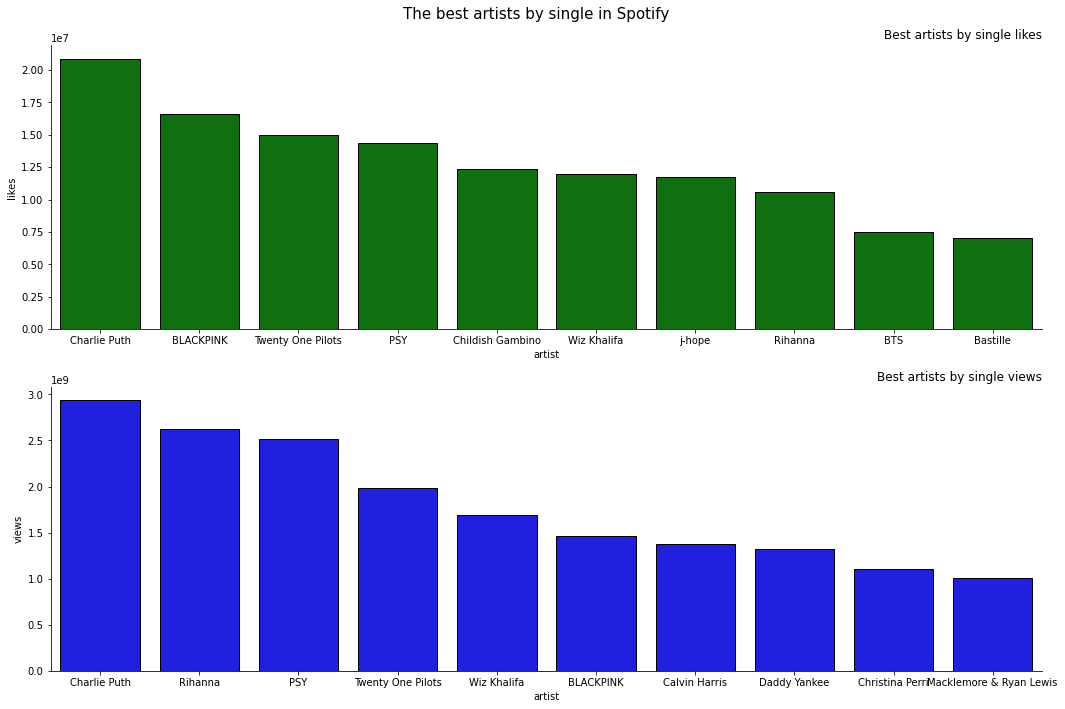

In [19]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.barplot(data = ten_best_single_by_likes, x = "artist", y = "likes", color = "green", edgecolor = "black", ax = ax[0]).set_title('Best artists by single likes', loc = "right")
sns.barplot(data = ten_best_single_by_views, x = "artist", y = "views", color = "b", edgecolor = "black", ax = ax[1]).set_title("Best artists by single views", loc = "right")

ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)   
ax[1].spines["right"].set_visible(False)

fig.suptitle("The best artists by single in Spotify", fontsize = 15)   
fig.tight_layout()    

**Encontramos una relación similar en el caso de los singles a la encontrada en el caso anterior.** 

Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:

- Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".
- Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.
- Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

In [20]:
df_feat = df_music[df_music["track"].str.contains("feat", case = False)]

In [21]:
feats_by_artist = df_feat.groupby("artist")["track"].count().reset_index().sort_values(by = "track", ascending = False)
feats_by_artist

,artist,track
62,Bibi und Tina,10
307,Juicy J,10
404,Macklemore,10
647,Ty Dolla ign,9
138,DJ Khaled,9
...,...,...
331,Kesha,1
330,Kenny Loggins,1
327,Kendrick Lamar,1
325,Kelly Rowland,1


In [22]:
#Los diez artistas con más colaboraciones. Los que más tienen diez y el top ten tiene ocho.
top_feat_artists = feats_by_artist.head(10)
top_feat_artists

,artist,track
62,Bibi und Tina,10
307,Juicy J,10
404,Macklemore,10
647,Ty Dolla ign,9
138,DJ Khaled,9
668,Wu-Tang Clan,9
47,B.o.B,8
405,Macklemore & Ryan Lewis,8
124,Clean Bandit,8
667,Wizkid,8


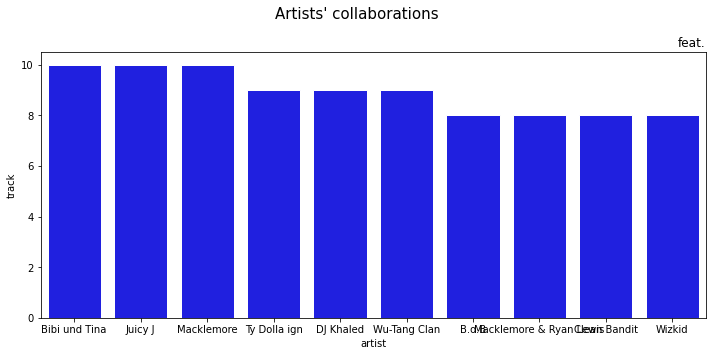

In [23]:
fig = plt.figure(figsize=(10,5))

sns.barplot(data = top_feat_artists, x = "artist", y = "track", color = "b", edgecolor = "white").set_title('feat.', loc = "right")

fig.suptitle("Artists' collaborations", fontsize = 15)   
fig.tight_layout()    


Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:

¿Qué tipo de álbumes tienden a tener más vistas en promedio?

¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?

¿Existen valores atípicos (outliers) en alguna categoría de álbumes?

¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

Antes de ver gráficas o estadísticos conviene estudiar un poco las columnas a través de operaciones sencillas.
- "album_type" - como ya vimos en la exploración no contiene nulos, contando con un total de 20.718 registros. Se divide en tres categorías que son "album", "single" y "compilation". De cara a ver su relación con cualquier otra variable es conveniente recordar como están distribuidas en la muestra. En este caso, "album" es la categoría del 72% del contenido de esta columna, "single" el 24,15% y "compilation" el 3.80%. El peso de las categorías es por tanto muy desigual en el conjunto de datos, aunque por otro lado, sí es probablemente significativo del tipo de productos que llegan a la plataforma y desde ese punto de vista, tienen sentido. 
- "views" - cuenta con 470 nulos. Es una columna de tipo numérico que contiene el número de visualizaciones de cada canción contenida en el dataset. 

In [24]:
total_album_type = df_music["album_type"].value_counts()
total_album_type

album          14926
single          5004
compilation      788
Name: album_type, dtype: int64

In [25]:
round(total_album_type*100/df_music.shape[0],2)

album          72.04
single         24.15
compilation     3.80
Name: album_type, dtype: float64

In [26]:
total_album_type[0:-1]*100/df_music.shape

album        72.043634
single    18533.333333
Name: album_type, dtype: float64

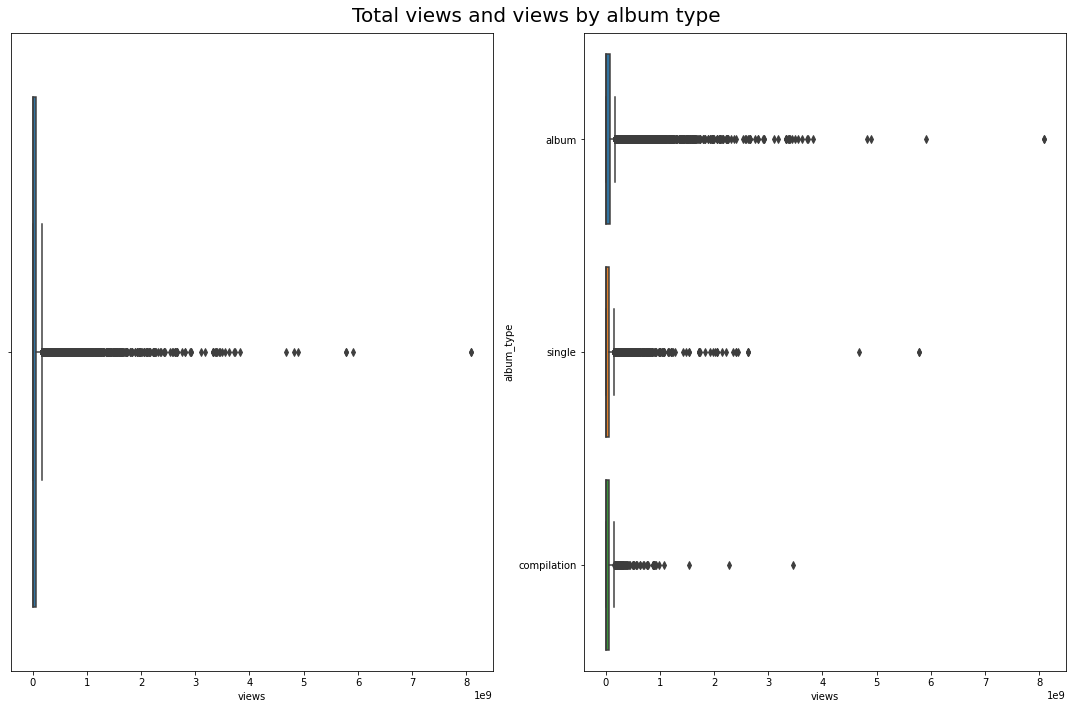

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

sns.boxplot(data=df_music, x = "views", ax=ax[0])
sns.boxplot(data=df_music, x = "views", y = "album_type", ax=ax[1])
fig.suptitle("Total views and views by album type", fontsize = 20)
fig.tight_layout() 
plt.show()

In [28]:
df_album_type = df_music.groupby("album_type")["views"].agg(["mean", "std"])
df_album_type

,mean,std
album_type,,
album,9.842739e+07,2.858933e+08
compilation,7.961832e+07,2.196741e+08
single,8.269886e+07,2.461023e+08


Se ha decidido incluir junto al boxplot de visitas por tipo de album otro de visitas totales para ver la correspondencia entre los dos, ya que la que se produce en visitas es la que cabe esperar en tipos de album. 

Podemos decir, apoyados también en una media  nada robusta que el tipo album recibe mas visitas. Nada extraordinario siendo el 74% del contenido de la plataforma, seguido muy de cerca por single y compilation. No existen grandes diferencias entre los tres tipos a pesar de su diferente presencia en los datos. 

La dispersión en el tipo album es tambien mayor, aunque en general, los estadísticos básicos sacados de estos datos no podrían considerarse, dada la cantidad de outliers, en todas las categorías,  y pronunciadamente en album, que están distorsionando los datos. 

No se pueden sacar conclusiones definitivas de estos datos en relación a las visitas y el tipo de album ya que diferentes factores están condicionando los resultados que vemos, los outliers y el diferente peso en la muestra. 

Sería necesario estudiar los outliers, o categorizar "views" y dividir la muestra de tal manera que contemos con datos homogéneos que no se distorsionen. 
Este tipo de gráficas y conjuntos de datos son habituales en este tipo de industria, música, videojuegos, libros, películaso, series, donde encontramos un gran mercado con mucha oferta pero realmente son muy pocos los contenidos que están consiguiendo la mayoría de visualizaciones, o ventas, o reviews. 